<a href="https://colab.research.google.com/github/smc9759/Assignment_OOP/blob/main/Many_PreProcess_DAGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 다양한 전처리 해보기

| 분류              | 전처리 종류                         | 목적 / 예시                                                   |
|-------------------|--------------------------------------|----------------------------------------------------------------|
| 🎯 정규화 계열     | Normalize, Standardize               | 픽셀값 0~1 or -1~1로 정리 (학습 안정화)                       |
| 📏 크기/형태 정리 | Resize, Crop, Padding                | 네트워크 input size 맞춤 (예: 224x224)                         |
| 🔁 증강 (Augmentation) | Flip, Rotate, Brightness, Noise     | 데이터 다양화 → 일반화 성능 향상                              |
| 🌈 채널/색 정보 변경 | Grayscale, RGB to HSV               | 필요한 정보만 남기거나 조명 영향 줄임                         |
| 🌀 형태 강조       | Histogram Equalization, CLAHE        | 명암 대비 강화 → defect 강조                                   |
| 🔉 노이즈 제거     | Gaussian Blur, Median Blur           | 센서 노이즈 제거 (주의: 정보 손실)                            |
| 🎯 영역 조정       | ROI Crop, Masking                    | 관심영역만 학습에 사용                                         |
| 🌐 공간 도메인 처리| Edge Detection, Dilation             | 잘 안 씀, 특수한 상황에서만 사용 가능                         |

> ✅ 전처리를 했을 때와 안 했을 때를 비교하면서 돌려보기


학습 목표:
반도체 기업에서 근무하며 현장에서 촬영한 이미지의 품질을 확인하고,
이를 개선할 필요성을 자주 느꼈습니다.
이를 계기로, 그림판처럼 단순한 도구가 아닌,
픽셀 좌표(x, y) 표시, 직접 crop 기능, 그리고 Normalization / Standardization
추천 기능 등을 갖춘 사용자 친화적인 이미지 전처리 앱을 개발해보고자 했습니다.
이 앱은 마치 스마트폰 카메라의 자동 보정 기능처럼 직관적입니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider, RadioButtons, fixed

In [ ]:
zip_path = "/content/drive/MyDrive/DAGM/Class1_def.zip"
extract_path = "/content/photos"  # 원하는 경로로 추출

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# Verify image path

img_path = os.path.join(extract_path, "Class1_def/14.png")  # 압축 안에 폴더 있을 경우

In [ ]:
# Load the image
img = cv2.imread(img_path)
img_color = cv2.imread(img_path, cv2.IMREAD_COLOR)

##채널/색 정보 변경

###Grayscale

###BGR to RGB

###픽셀 정보 표기

이미지 shape (높이, 너비, 채널): (512, 512)
데이터 타입: uint8


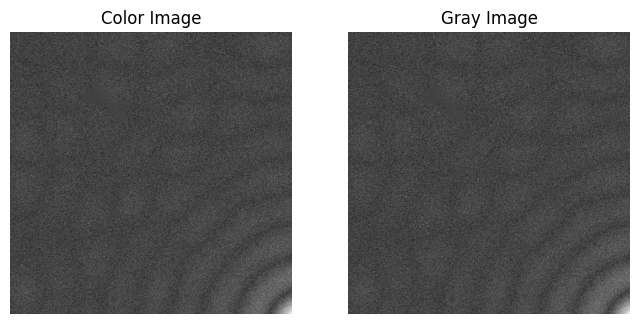

In [ ]:
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
print("이미지 shape (높이, 너비, 채널):", img_gray.shape)
print("데이터 타입:", img_gray.dtype)
fig = plt.figure(figsize=(8,6))

fig.add_subplot(1, 2, 1)
plt.axis("off")
plt.imshow(cv2.cvtColor( img_color, cv2.COLOR_BGR2RGB))
plt.title("Color Image")

fig.add_subplot(1, 2, 2)
plt.axis("off")
plt.imshow(img_gray, cmap='gray')
plt.title("Gray Image")

plt.show()

##형태 강조

###히스토그램 생성

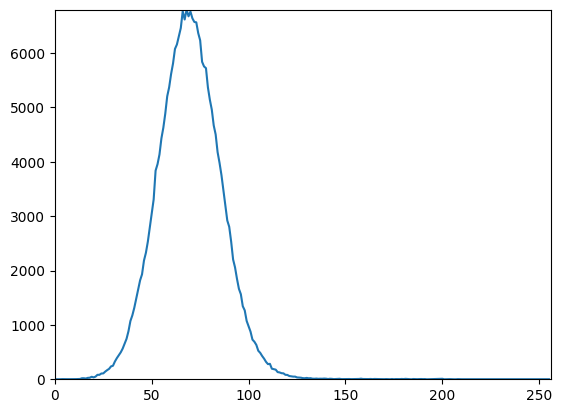

In [ ]:
img_gray_hist = cv2.calcHist([img_gray], [0], None, [256], [0,256])

plt.plot(img_gray_hist)
plt.xlim([0, 256])
plt.ylim([0, np.max(img_gray_hist)])
plt.show()

###이진화

이미지 중간값: 69.0


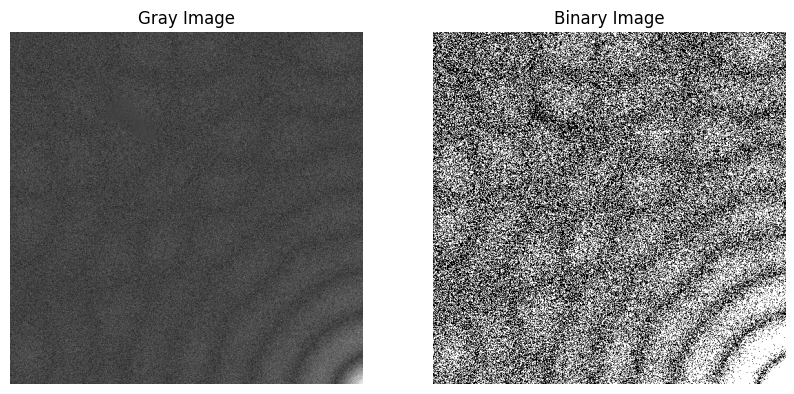

In [ ]:
print("이미지 중간값:",np.median(img_gray))
ret,img_binary = cv2.threshold(img_gray, np.median(img_gray), 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(10,8))

fig.add_subplot(1, 2, 1)
plt.axis("OFF")
plt.imshow(img_gray, cmap='gray')
plt.title("Gray Image")

fig.add_subplot(1, 2, 2)
plt.axis("OFF")
plt.imshow(img_binary, cmap='gray')
plt.title("Binary Image")

plt.show()

###Histogram Equalization

균일한 이미지에 사용
명암 대비 강조

In [ ]:
# 전처리 함수 정의
def apply_enhancement(method, clip_limit):
    if method == 'Histogram Equalization':
        enhanced = cv2.equalizeHist(img_gray)
    elif method == 'CLAHE':
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8,8))
        enhanced = clahe.apply(img_gray)
    else:
        enhanced = img_gray  # 원본

    # 시각화
    plt.figure(figsize=(6, 6))
    plt.imshow(enhanced, cmap='gray')
    plt.title(f'{method} (clip_limit={clip_limit})')
    plt.axis('off')
    plt.show()

###CLAHE

밝기가 불균일한 이미지에 사용.
균형 잡힌 대비 제공.

In [ ]:
# 방법 선택 라디오 버튼
method_selector = RadioButtons(
    options=['Histogram Equalization', 'CLAHE'],
    description='Enhancement Method:',
    style={'description_width': 'initial'}
)

# 동적 슬라이더 생성 함수
def dynamic_slider(method):
    if method == 'Histogram Equalization':
        interact(apply_enhancement, method=fixed(method), clip_limit=fixed(2.0))
    elif method == 'CLAHE':
        interact(apply_enhancement, method=fixed(method), clip_limit=FloatSlider(min=1.0, max=10.0, step=0.5, value=2.0))

interact(dynamic_slider, method=method_selector)

interactive(children=(RadioButtons(description='Enhancement Method:', options=('Histogram Equalization', 'CLAH…

<function __main__.dynamic_slider(method)>

##크기/형태 정리

###확대/축소

함수, 스크롤바 (정사각형)

In [ ]:
def resize_image(scale_percent):
    # 크기 비율 적용
    width = int(img_gray.shape[1] * scale_percent / 100)
    height = int(img_gray.shape[0] * scale_percent / 100)
    dim = (width, height)

    # 크기 조절
    resized = cv2.resize(img_gray, dim, interpolation=cv2.INTER_AREA)

    # 시각화
    plt.figure(figsize=(5, 5))
    plt.imshow(resized)
    plt.title(f'Resized to {scale_percent}% ({width}x{height})')
    plt.axis('off')
    plt.show()

# 슬라이더 설정 (10% ~ 200%)
interact(resize_image, scale_percent=IntSlider(min=10, max=200, step=10, value=100))

interactive(children=(IntSlider(value=100, description='scale_percent', max=200, min=10, step=10), Output()), …

<function __main__.resize_image(scale_percent)>

###Padding

✅ Padding 방법의 종류
Zero Padding (0으로 채우기)

경계에 검은 여백(0) 추가

Edge Padding (가장자리 값 복사)

경계의 가장자리 픽셀 값을 복사

Reflect Padding (반사 복사)

이미지를 거울처럼 반사

Constant Padding (특정 값으로 채우기)

사용자가 지정한 고정값으로 채움

In [ ]:
# 패딩 적용 함수 정의
def apply_padding(padding_type):
    if padding_type == 'Zero Padding':
        padded = cv2.copyMakeBorder(img_gray, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    elif padding_type == 'Edge Padding':
        padded = cv2.copyMakeBorder(img_gray, 50, 50, 50, 50, cv2.BORDER_REPLICATE)
    elif padding_type == 'Reflect Padding':
        padded = cv2.copyMakeBorder(img_gray, 50, 50, 50, 50, cv2.BORDER_REFLECT)
    elif padding_type == 'Constant Padding (255,255,255)':
        padded = cv2.copyMakeBorder(img_gray, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=[255, 255, 255])

    # 시각화
    plt.figure(figsize=(6,6))
    plt.imshow(padded)
    plt.title(padding_type)
    plt.axis('off')
    plt.show()

# 라디오 버튼 생성 및 연결
interact(apply_padding, padding_type=RadioButtons(
    options=['Zero Padding', 'Edge Padding', 'Reflect Padding', 'Constant Padding (255,255,255)'],
    description='Padding Type:',
    style={'description_width': 'initial'}
))

interactive(children=(RadioButtons(description='Padding Type:', options=('Zero Padding', 'Edge Padding', 'Refl…

<function __main__.apply_padding(padding_type)>

###자르기

array([[[ 81,  81,  81],
        [ 56,  56,  56],
        [ 66,  66,  66],
        ...,
        [ 85,  85,  85],
        [ 28,  28,  28],
        [ 55,  55,  55]],

       [[ 62,  62,  62],
        [ 72,  72,  72],
        [ 44,  44,  44],
        ...,
        [ 54,  54,  54],
        [ 45,  45,  45],
        [ 83,  83,  83]],

       [[ 56,  56,  56],
        [ 75,  75,  75],
        [ 80,  80,  80],
        ...,
        [ 82,  82,  82],
        [101, 101, 101],
        [ 32,  32,  32]],

       ...,

       [[ 63,  63,  63],
        [ 74,  74,  74],
        [ 42,  42,  42],
        ...,
        [199, 199, 199],
        [236, 236, 236],
        [245, 245, 245]],

       [[ 59,  59,  59],
        [ 58,  58,  58],
        [ 42,  42,  42],
        ...,
        [255, 255, 255],
        [232, 232, 232],
        [248, 248, 248]],

       [[ 60,  60,  60],
        [ 50,  50,  50],
        [ 80,  80,  80],
        ...,
        [242, 242, 242],
        [202, 202, 202],
        [246, 246, 246]]], dtype=uint8)
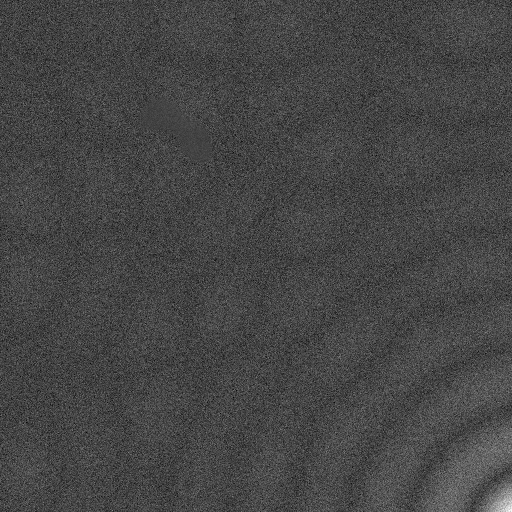

In [ ]:
img_color_copy = img_color.copy()

# tuple (x,y-axis)
# start point: (753,1210), end point: (2115,2110),
# thickness 30, white color rectangular line
cv2.rectangle(img_color_copy,(753,1210),(2115,2110),(255,255,255),30)

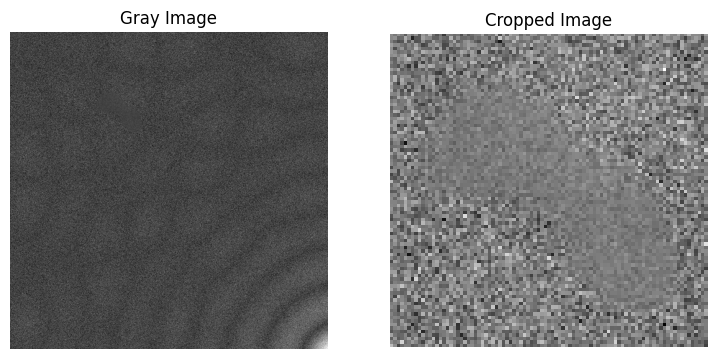

In [ ]:
start_pt = [83, 130]     # [y, x-axis] or (y, x-axis), both are fine
end_pt = [173, 221]      # [y, x-axis]
img_gray_crop = img_gray[start_pt[0]:end_pt[0], start_pt[1]:end_pt[1]]     # numpy slicing

fig = plt.figure(figsize=(9, 7))

fig.add_subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img_gray, cmap='gray')
plt.title("Gray Image")

fig.add_subplot(1, 2, 2)
plt.axis("off")
plt.imshow(img_gray_crop, cmap='gray')
plt.title("Cropped Image")

plt.show()

###선형 연산
이미지에 임의로 픽셀값의 N%를 상향/하향한다

In [ ]:
# 이미지 출력 함수
def show_images(img_original, img_modified, factor):
    fig = plt.figure(figsize=(10, 4))

    fig.add_subplot(1, 2, 1)
    plt.axis("off")
    plt.imshow(img_original, cmap='gray')
    plt.title('Original')

    fig.add_subplot(1, 2, 2)
    plt.axis("off")
    plt.imshow(img_modified, cmap='gray')
    plt.title(f'Intensity x {factor:.2f}')

    plt.tight_layout()
    plt.show()

In [ ]:
# 히스토그램 출력 함수
def show_histograms(img_original, img_modified, factor):
    hist_original = cv2.calcHist([img_original], [0], None, [256], [0, 256])
    hist_modified = cv2.calcHist([img_modified], [0], None, [256], [0, 256])

    fig = plt.figure(figsize=(10, 4))

    fig.add_subplot(1, 2, 1)
    plt.plot(hist_original)
    plt.title('Original Histogram')
    plt.xlim([0, 256])

    fig.add_subplot(1, 2, 2)
    plt.plot(hist_modified)
    plt.title(f'Histogram x {factor:.2f}')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

In [ ]:
def update_brightness(factor):
    # 밝기 조절
    img_modified = np.clip(img_gray_crop * factor, 0, 255).astype('uint8')

    # 함수 호출
    show_images(img_gray_crop, img_modified, factor)
    show_histograms(img_gray_crop, img_modified, factor)

# 슬라이더 UI
interact(update_brightness, factor=FloatSlider(value=1.0, min=0.1, max=2.0, step=0.05))

interactive(children=(FloatSlider(value=1.0, description='factor', max=2.0, min=0.1, step=0.05), Output()), _d…

<function __main__.update_brightness(factor)>

##증강

###Flip

In [ ]:
# 증강 함수 정의
def flip_image(img, mode='horizontal'):
    if mode == 'horizontal':
        return cv2.flip(img, 1)
    elif mode == 'vertical':
        return cv2.flip(img, 0)
    elif mode == 'both':
        return cv2.flip(img, -1)


###Rotate

In [ ]:

def rotate_image(img, angle=90):
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, matrix, (w, h))



###Brightness 조정

저조도 상황 보완

In [ ]:
def adjust_brightness(img, factor=1.2):
    # Grayscale 처리
    if len(img.shape) == 2:
        result = np.clip(img.astype(np.float32) * factor, 0, 255).astype(np.uint8)
        return result
    # RGB 처리
    else:
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float32)
        hsv[..., 2] = np.clip(hsv[..., 2] * factor, 0, 255)
        return cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)


###Noise 추가

보통 반도체에서는 Noise를 쓸일이 없는게 조명 떨림을 석반정으로 최소화하고 먼지도 최대한 없애기 때문에 그렇다

In [ ]:
def add_noise(img, noise_level=25):
    noise = np.random.randint(-noise_level, noise_level, img.shape, dtype='int16')
    noisy_img = img.astype('int16') + noise
    return np.clip(noisy_img, 0, 255).astype('uint8')

In [ ]:
# 인터랙션 함수
def apply_augmentation(augmentation_type, value):
    if augmentation_type == 'Flip':
        result = flip_image(img_gray, value)
    elif augmentation_type == 'Rotate':
        result = rotate_image(img_gray, value)
    elif augmentation_type == 'Brightness':
        result = adjust_brightness(img_gray, value)
    elif augmentation_type == 'Noise':
        result = add_noise(img_gray, value)
    else:
        result = img_gray

    plt.figure(figsize=(6, 6))
    plt.imshow(result)
    plt.title(f'{augmentation_type} - {value}')
    plt.axis('off')
    plt.show()

# 증강 종류 라디오 버튼
augmentation_selector = RadioButtons(
    options=['Flip', 'Rotate', 'Brightness', 'Noise'],
    description='Augmentation:',
    style={'description_width': 'initial'}
)

In [ ]:
# 동적 슬라이더 생성 함수
def dynamic_slider(augmentation_type):
    if augmentation_type == 'Flip':
        interact(apply_augmentation, augmentation_type=fixed(augmentation_type), value=RadioButtons(options=['horizontal', 'vertical', 'both']))
    elif augmentation_type == 'Rotate':
        interact(apply_augmentation, augmentation_type=fixed(augmentation_type), value=IntSlider(min=0, max=360, step=90, value=90))
    elif augmentation_type == 'Brightness':
        interact(apply_augmentation, augmentation_type=fixed(augmentation_type), value=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.2))
    elif augmentation_type == 'Noise':
        interact(apply_augmentation, augmentation_type=fixed(augmentation_type), value=IntSlider(min=0, max=50, step=5, value=25))

from ipywidgets import fixed
interact(dynamic_slider, augmentation_type=augmentation_selector)

interactive(children=(RadioButtons(description='Augmentation:', options=('Flip', 'Rotate', 'Brightness', 'Nois…

<function __main__.dynamic_slider(augmentation_type)>

##노이즈 제거

###Gaussian, Median Blur

In [ ]:
# 블러 처리 함수 정의
def apply_blur(method, ksize):
    # 커널 크기 홀수 보정
    if ksize % 2 == 0:
        ksize += 1

    if method == 'Gaussian Blur':
        blurred = cv2.GaussianBlur(img_gray, (ksize, ksize), 0)
    elif method == 'Median Blur':
        blurred = cv2.medianBlur(img_gray, ksize)
    else:
        blurred = img_gray

    # 시각화
    plt.figure(figsize=(6, 6))
    plt.imshow(blurred, cmap='gray')
    plt.title(f'{method} (kernel size={ksize})')
    plt.axis('off')
    plt.show()

# 기법 선택 라디오 버튼
blur_selector = RadioButtons(
    options=['Gaussian Blur', 'Median Blur'],
    description='Noise Reduction Method:',
    style={'description_width': 'initial'}
)

# 동적 슬라이더 생성 함수
def dynamic_blur_slider(method):
    interact(apply_blur, method=fixed(method), ksize=IntSlider(min=1, max=21, step=2, value=3))

interact(dynamic_blur_slider, method=blur_selector)

interactive(children=(RadioButtons(description='Noise Reduction Method:', options=('Gaussian Blur', 'Median Bl…

<function __main__.dynamic_blur_slider(method)>

##정규화 계열

###Nomalization

Max value of img_gray_copy:  1.0
Min value of img_gray_copy:  0.0


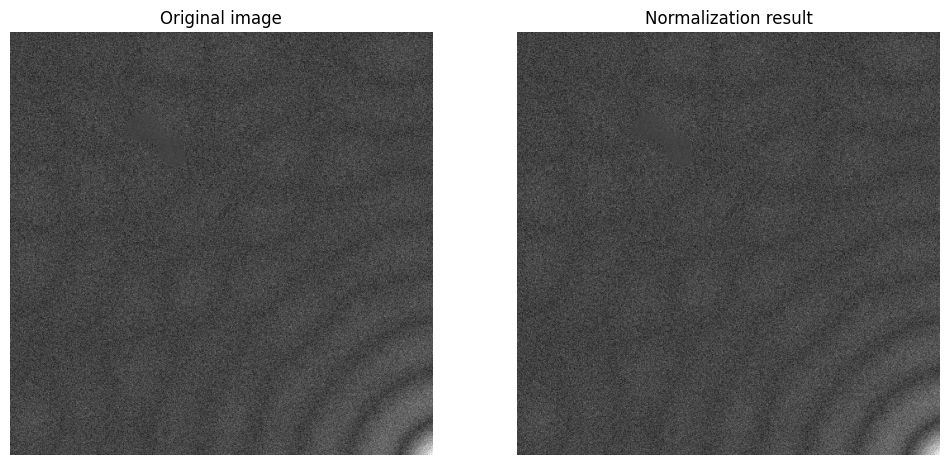

In [ ]:
# data type conversion and rescaling
img_gray_copy = img_gray.copy().astype(np.float32) # convert from uint8 to float32 type data
img_gray_copy /= 255.                              # rescaling

max_value = np.max(img_gray_copy)
print("Max value of img_gray_copy: ", max_value)
min_value = np.min(img_gray_copy)
print("Min value of img_gray_copy: ", min_value)

# pixel normalization: Scales values of the pixels in 0-1 range.
# min-max scaling = (X - Xmin) / (Xmax - Xmin), where X is a pixel of an image data
img_gray_normal = (img_gray_copy - min_value) / (max_value - min_value)

fig = plt.figure(figsize=(12, 10))
fig.add_subplot(1,2,1)
plt.axis("off")
plt.imshow(img_gray_copy, cmap='gray')
plt.title('Original image')

fig.add_subplot(1,2,2)
plt.axis("off")
plt.imshow(img_gray_normal, cmap='gray')
plt.title('Normalization result')

plt.show()

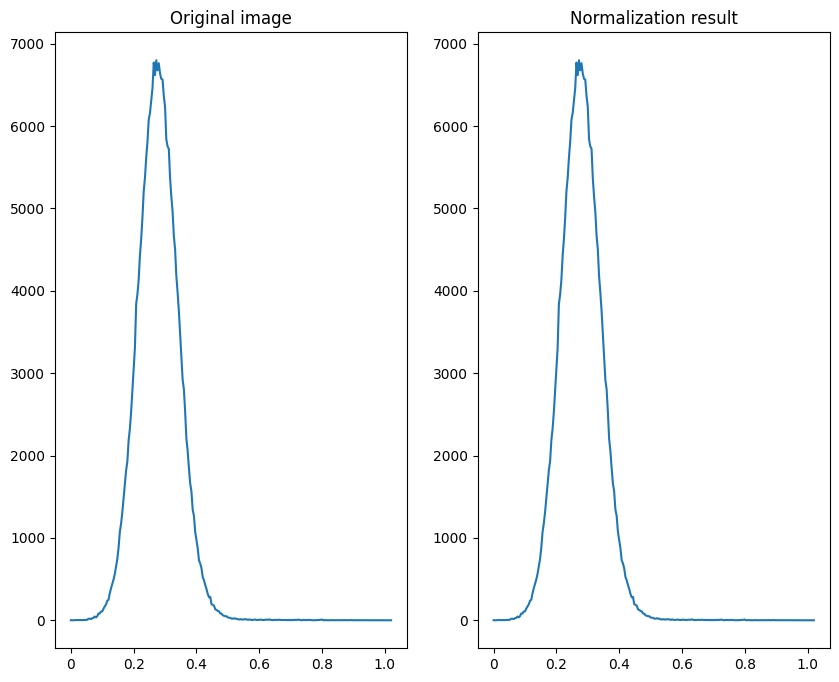

In [ ]:
img_gray_hist = cv2.calcHist([img_gray_copy], [0], None, [256], [0, 1.0])
img_gray_normal_hist = cv2.calcHist([img_gray_normal], [0], None, [256], [0, 1.0])

fig = plt.figure( figsize=(10, 8) )     # histograms

fig.add_subplot(1, 2, 1)
plt.plot(img_gray_hist)
plt.title('Original image')
plt.xticks(np.arange(0, 256, step=50), ['0', '0.2', '0.4', '0.6', '0.8', '1.0'])

fig.add_subplot(1, 2, 2)
plt.plot(img_gray_normal_hist)
plt.title('Normalization result')
plt.xticks(np.arange(0, 256, step=50), ['0', '0.2', '0.4', '0.6', '0.8', '1.0'])

plt.show()

###Standardization

Mean value of img_gray_copy:  0.2729113
Standard deviation of img_gray_copy:  0.06402462


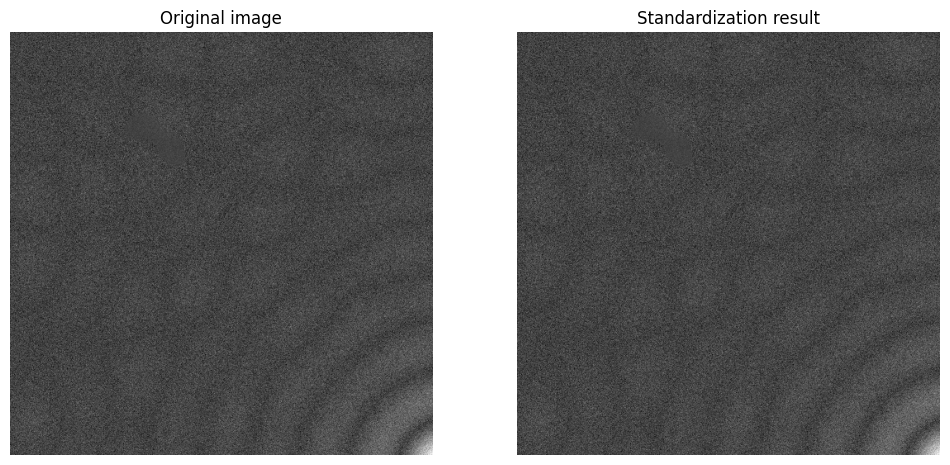

In [ ]:
mean_value = np.mean(img_gray_copy);
print("Mean value of img_gray_copy: ", mean_value)
std_value = np.std(img_gray_copy);
print("Standard deviation of img_gray_copy: ", std_value)

# pixel Standardization:
# Scales values of the pixels to have 0 mean and unit (1) variance.
# standardization = (X - Xmean) / Xstd
img_gray_stand = (img_gray_copy - mean_value) / std_value

fig = plt.figure(figsize=(12, 10)) # (12,10)
fig.add_subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img_gray_copy, cmap='gray')
plt.title('Original image')

fig.add_subplot(1, 2, 2)
plt.axis("off")
plt.imshow(img_gray_stand, cmap='gray')
plt.title('Standardization result')

plt.show()

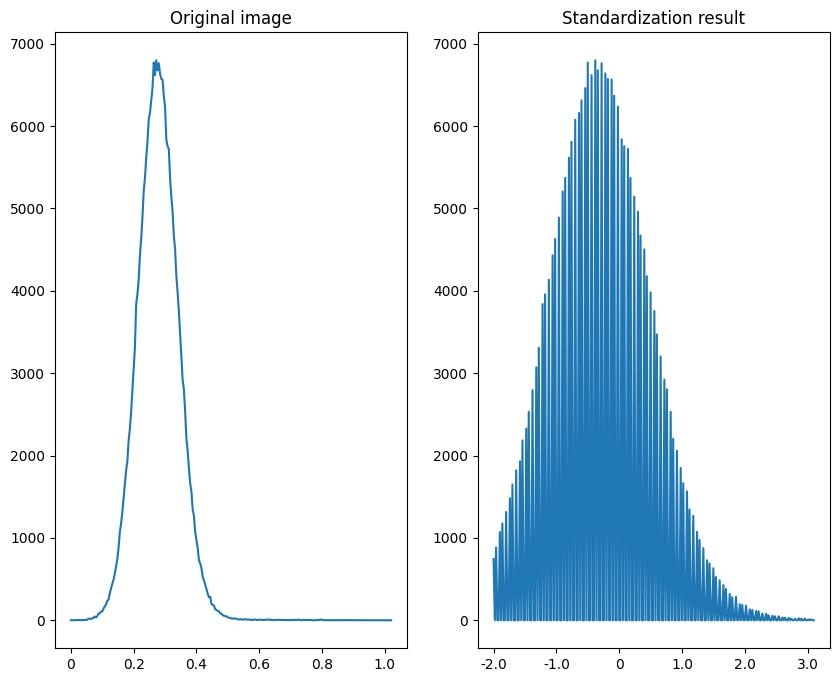

In [ ]:
img_gray_hist = cv2.calcHist([img_gray_copy], [0], None, [256], [0, 1.0])
img_gray_stand_hist = cv2.calcHist([img_gray_stand], [0], None, [256], [-2.0, 4.0])

fig = plt.figure(figsize=(10,8))     # histograms

fig.add_subplot(1, 2, 1)
plt.plot(img_gray_hist)
plt.title('Original image')
plt.xticks(np.arange(0, 256, step=50), ['0', '0.2', '0.4', '0.6', '0.8', '1.0'])

fig.add_subplot(1,2,2)
plt.plot(img_gray_stand_hist)
plt.title('Standardization result')
plt.xticks(np.arange(0, 256, step=50),['-2.0', '-1.0', '0', '1.0', '2.0', '3.0'])

plt.show()